In [2]:
import numpy as np
import pandas as pd
import json 
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
import sqlite3 

In [4]:
car_values=pd.read_csv('car data.csv')

In [5]:
# load dataset into python
car_details=pd.read_csv('CAR_DETAILS_FROM_CAR_DEKHO.csv')

In [6]:
type(car_details)

pandas.core.frame.DataFrame

In [7]:
car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
car_values.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
print(car_values.shape)

(301, 9)


In [10]:
print(car_details.shape)

(4340, 8)


In [11]:
engine=create_engine('sqlite:///carmarket.db')

In [12]:
def load_dataframe(df,table_name,engine):
    df.to_sql(table_name,con=engine,if_exists='replace',index=False)
load_dataframe(car_details,'details',engine)

In [13]:
load_dataframe(car_values,'true_values',engine)

In [14]:
connection=sqlite3.connect('carmarket.db')

4069

In [15]:
tables=pd.read_sql_query("select name from sqlite_master where type='table'",connection)

In [35]:
tables

,name
0,details
1,true_values


In [17]:
for table in tables['name']:
    display(pd.read_sql_query(f'select * from {table} limit 5',connection))

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
# 1. What is the average selling price of each car model, along with the year of purchase and transmission type?
pd.read_sql_query('select name,avg(selling_price) as avg_selling_price ,count(name), year,transmission from details group by name,year,transmission order by name limit 20',connection)


,name,avg_selling_price,count(name),year,transmission
0,Ambassador CLASSIC 1500 DSL AC,120000.0,2,2005,Manual
1,Ambassador Classic 2000 Dsz,50000.0,1,2002,Manual
2,Ambassador Grand 1800 ISZ MPFI PW CL,430000.0,1,2012,Manual
3,Audi A4 1.8 TFSI,1200000.0,1,2012,Automatic
4,Audi A4 2.0 TDI,1295000.0,1,2011,Automatic
5,Audi A4 2.0 TDI 177 Bhp Premium Plus,1150000.0,2,2013,Automatic
6,Audi A4 3.0 TDI Quattro,1580000.0,12,2013,Automatic
7,Audi A4 30 TFSI Technology,3100000.0,2,2018,Automatic
8,Audi A4 35 TDI Premium,2300000.0,1,2015,Automatic
9,Audi A4 35 TDI Premium Plus,3256000.0,1,2019,Automatic


In [19]:
#2 Price Trend Analysis
# What is the average selling price of cars based on the year of purchase? 
old_cars=pd.read_sql_query('select year,(sum(selling_price)/count(name)) as avg_selling_price,count(name) from details where year between 2003 and 2018 group by year ',connection)

Text(0.5, 1.0, 'Average Selling Price Over the Years')

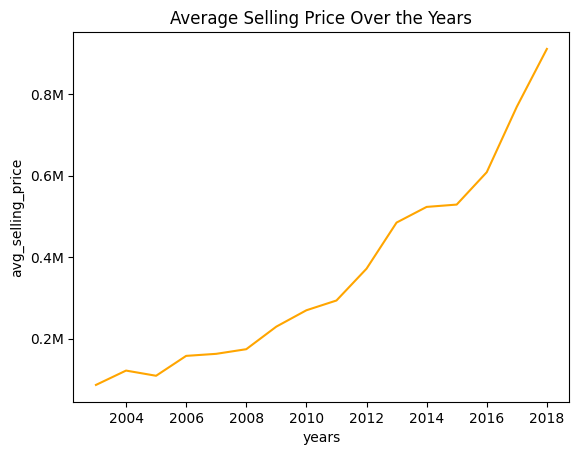

In [20]:
plt.plot(old_cars['year'],old_cars['avg_selling_price'],color='orange')
plt.xlabel('years')
plt.ylabel('avg_selling_price')

formatter = ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Average Selling Price Over the Years')

In [21]:
#3 What is the average selling price of new cars based on year? 
pd.read_sql_query(
    'SELECT year, round(AVG(Present_Price)*100000,0) AS new_price FROM true_values GROUP BY year', 
    connection
)

,Year,new_price
0,2003,513000.0
1,2004,1235000.0
2,2005,948500.0
3,2006,905750.0
4,2007,66500.0
5,2008,475957.0
6,2009,1060167.0
7,2010,1433067.0
8,2011,514805.0
9,2012,798478.0


In [22]:
#4 How does the selling price vary between cars with different fuel types?
fuel_types=pd.read_sql_query(
    'SELECT Fuel,round(avg(selling_price),0) as price  from details GROUP BY fuel', 
    connection
)

Text(0, 0.5, 'average of price')

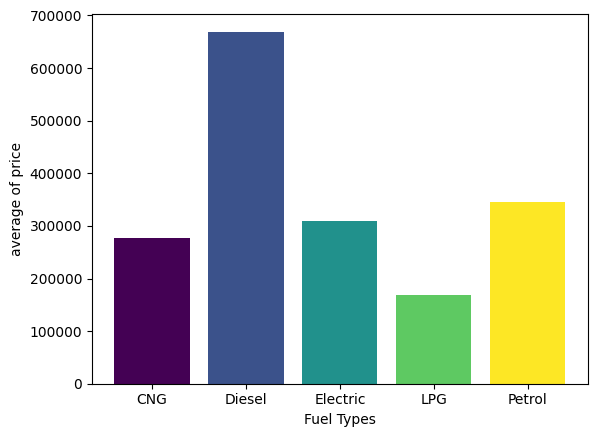

In [23]:
colors = plt.cm.viridis(np.linspace(0, 1, len(fuel_types)))
plt.bar(fuel_types['fuel'],fuel_types['price'],color=colors)
plt.xlabel('Fuel Types')
plt.ylabel('average of price')

In [24]:
#5 How does the selling price vary with the number of owners?
owners=pd.read_sql_query(
    'SELECT owner,round(avg(selling_price),0) as price  from details GROUP BY owner order by price desc', 
    connection
)

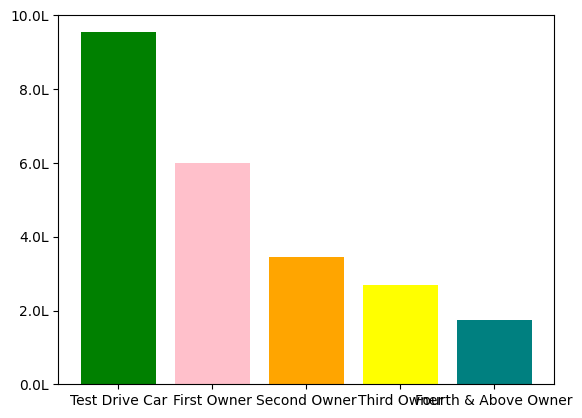

In [25]:
colors={'green','orange','pink','yellow','teal'}
plt.bar(owners['owner'],owners['price'],color=colors)
formatter = ticker.FuncFormatter(lambda x, pos: f'{x*10e-6:.1f}L')
plt.gca().yaxis.set_major_formatter(formatter)

In [26]:
#6 correlation between KM Driven and. Selling Price
car_details = pd.read_sql_query(
    'SELECT km_driven, selling_price AS price FROM details ORDER BY price DESC',
    connection
)
correlation = car_details['km_driven'].corr(car_details['price'])
print(f'Correlation between KM Driven and Selling Price: {correlation}')


Correlation between KM Driven and Selling Price: -0.1922886305451139


In [29]:
#7 the car having more number of models
car_popularity = pd.read_sql_query("""
    SELECT Car_Name, COUNT(*) AS numbers_of_model
    FROM true_values 
    GROUP BY Car_Name 
    ORDER BY numbers_of_model DESC
""", connection)
print(car_popularity.head(10))



        Car_Name  numbers_of_model
0           city                26
1  corolla altis                16
2          verna                14
3       fortuner                11
4           brio                10
5         innova                 9
6            i20                 9
7           ciaz                 9
8      grand i10                 8
9           jazz                 7


In [30]:
#8 the top 20 most frequently available car and their quantity?
same_model=pd.read_sql_query('select name,fuel,count(name ) as no_of_car from details group by name,fuel order by no_of_car desc' ,connection)
print(same_model.head(20))

                         name    fuel  no_of_car
0      Maruti Swift Dzire VDI  Diesel         69
1         Maruti Alto 800 LXI  Petrol         59
2             Maruti Alto LXi  Petrol         47
3        Hyundai EON Era Plus  Petrol         35
4              Maruti Alto LX  Petrol         35
5       Maruti Swift VDI BSIV  Diesel         29
6    Maruti Wagon R VXI BS IV  Petrol         29
7            Maruti Swift VDI  Diesel         27
8      Hyundai EON Magna Plus  Petrol         24
9    Maruti Wagon R LXI Minor  Petrol         24
10              Maruti 800 AC  Petrol         23
11         Maruti Wagon R LXI  Petrol         23
12          Hyundai i10 Magna  Petrol         22
13     Mahindra XUV500 W8 2WD  Diesel         22
14            Maruti Ritz VDi  Diesel         22
15    Hyundai Santro Xing GLS  Petrol         21
16        Maruti Alto K10 VXI  Petrol         21
17           Renault KWID RXT  Petrol         21
18  Hyundai Creta 1.6 CRDi SX  Diesel         19
19   Chevrolet Beat 

In [53]:
#9 How much value does a car lose on average per year?
#10 What is the average depreciation rate for cars in the dataset?
details = pd.read_sql_query('SELECT Car_Name, Year, Selling_Price, Present_Price FROM true_values', connection)


In [55]:
details['years'] = 2018- details['Year']

In [56]:
details['depreciation_rate'] = (details['Present_Price'] - details['Selling_Price']) / details['years']

details = details[details['years'] > 0]
details = details[details['Present_Price'] > details['Selling_Price']]

average_depreciation_rate = details['depreciation_rate'].mean()

print(f'Average Depreciation Rate per year: {average_depreciation_rate:.2f} currency units per year')

Average Depreciation Rate per year: 0.71 currency units per year


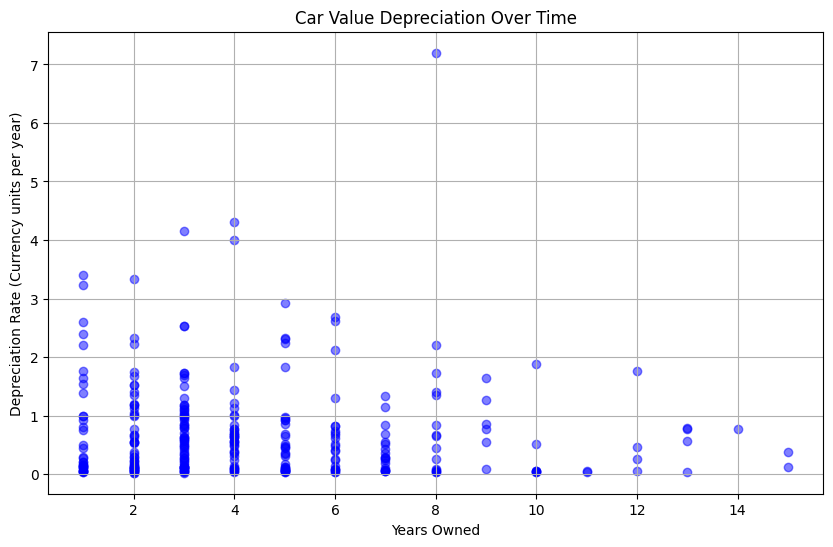

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(details['years'], details['depreciation_rate'], color='blue', alpha=0.5)
plt.title('Car Value Depreciation Over Time')
plt.xlabel('Years Owned')
plt.ylabel('Depreciation Rate (Currency units per year)')
plt.grid(True)
